
# Hand Gesture Recognition using LeapGestRecog Dataset

## Problem Statement
Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human–computer interaction and gesture-based control systems.

---

### Note on Dataset
In this notebook, we address the **image-based** part of the problem statement.  
We use the **LeapGestRecog dataset** (infrared still images, 10 gesture classes).  
Extending to video-based gesture recognition would require a temporal dataset and sequence models (e.g., 3D CNNs, LSTMs, Transformers).



## Dataset: LeapGestRecog
The dataset contains ~20,000 near-infrared images across **10 gesture classes**.  
Each gesture is performed by 10 subjects. Images are organized in class-wise folders.


In [1]:
# Install Kaggle API if not already installed
!pip install -q kaggle

# Make a kaggle directory and copy kaggle.json
import os
os.makedirs("/root/.kaggle", exist_ok=True)

# Upload kaggle.json manually (Colab prompt)
from google.colab import files
files.upload()

# Move kaggle.json to the correct path
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d gti-upm/leapgestrecog -p /content/

# Unzip the dataset
!unzip -q /content/leapgestrecog.zip -d /content/leapGestRecog


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 99% 2.11G/2.13G [00:12<00:00, 242MB/s]
100% 2.13G/2.13G [00:12<00:00, 188MB/s]


In [2]:

import os
import zipfile
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Unzip dataset if not already done
!unzip -q "/content/leapGestRecog.zip" -d "/content/"

DATASET_DIR = "/content/leapGestRecog"

# Image size & batch
IMG_SIZE = (128,128)
BATCH_SIZE = 32

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


unzip:  cannot find or open /content/leapGestRecog.zip, /content/leapGestRecog.zip.zip or /content/leapGestRecog.zip.ZIP.
Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [3]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False  # Transfer learning

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,586,434 (9.87 MB)

 Trainable params: 328,450 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 702s 696ms/step - accuracy: 0.5011 - loss: 0.7604 - val_accuracy: 0.4990 - val_loss: 0.6935
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 703s 703ms/step - accuracy: 0.4986 - loss: 0.6935 - val_accuracy: 0.4999 - val_loss: 0.6932
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 682s 682ms/step - accuracy: 0.4946 - loss: 0.6934 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 682s 682ms/step - accuracy: 0.4905 - loss: 0.6933 - val_accuracy: 0.5004 - val_loss: 0.6931
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 682s 682ms/step - accuracy: 0.5077 - loss: 0.6931 - val_accuracy: 0.5002 - val_loss: 0.6933
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 681s 681ms/step - accuracy: 0.4983 - loss: 0.6935 - val_accuracy: 0.4999 - val_loss: 0.6932
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 684s 682ms/step - accuracy: 0.5002 - loss: 0.6933 - val_accuracy: 0.5001 - val_loss: 0.6931
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 684s 684ms/step - ac

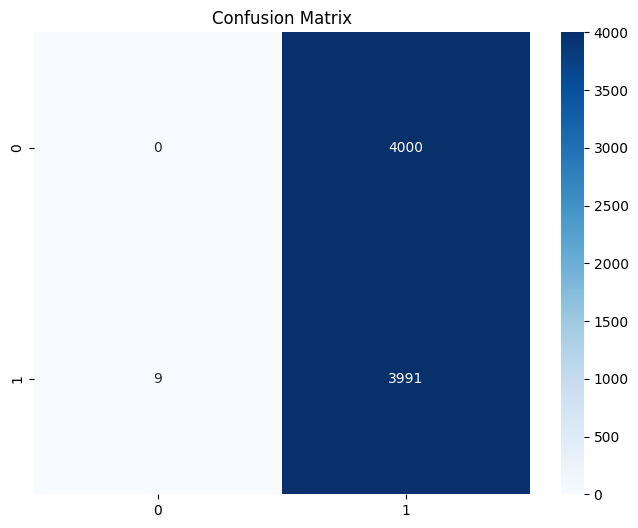

               precision    recall  f1-score   support

leapGestRecog       0.00      0.00      0.00      4000
leapgestrecog       0.50      1.00      0.67      4000

     accuracy                           0.50      8000
    macro avg       0.25      0.50      0.33      8000
 weighted avg       0.25      0.50      0.33      8000



In [4]:

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

# Evaluate
loss, acc = model.evaluate(val_gen)
print(f"✅ Validation Accuracy: {acc*100:.2f}%")

# Confusion Matrix
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_true = val_gen.classes
y_pred = np.argmax(model.predict(val_gen), axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred, target_names=val_gen.class_indices.keys()))


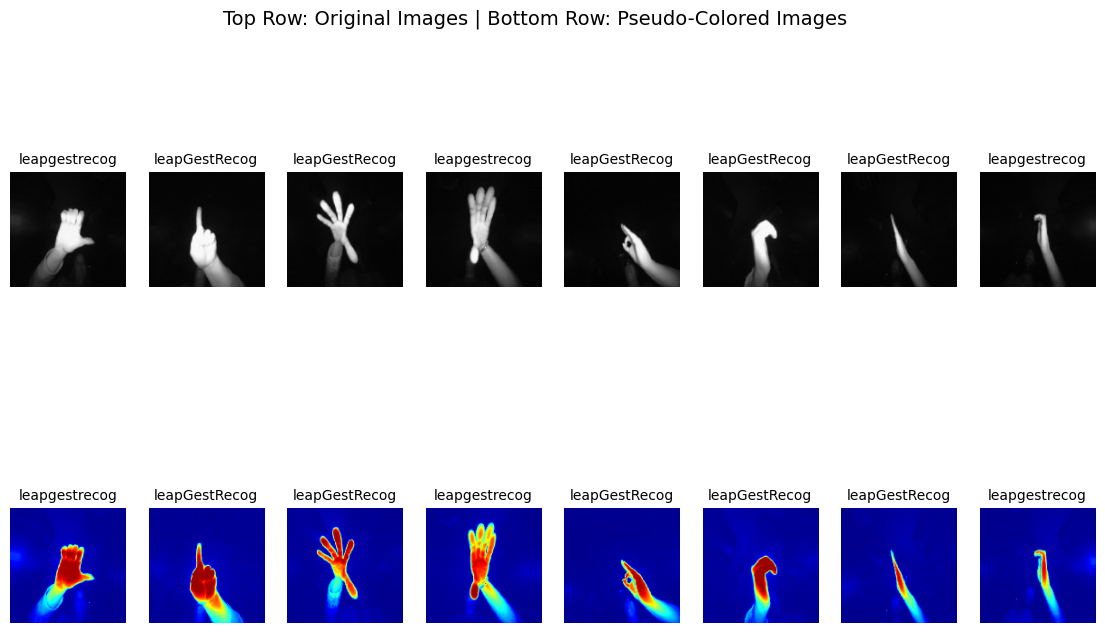

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

class_names = list(train_gen.class_indices.keys())

images, labels = next(train_gen)  # get one batch

plt.figure(figsize=(14, 8))

for i in range(8):
    # Original grayscale-looking image
    img_gray = (images[i] * 255).astype("uint8")

    # Pseudo-color (apply heatmap)
    img_color = cv2.applyColorMap(img_gray, cv2.COLORMAP_JET)
    img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)  # BGR→RGB for matplotlib

    # Plot original
    plt.subplot(2, 8, i+1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])], fontsize=10)
    plt.axis("off")

    # Plot pseudo-colored
    plt.subplot(2, 8, i+9)
    plt.imshow(img_color)
    plt.title(class_names[np.argmax(labels[i])], fontsize=10)
    plt.axis("off")

plt.suptitle("Top Row: Original Images | Bottom Row: Pseudo-Colored Images", fontsize=14)
plt.show()


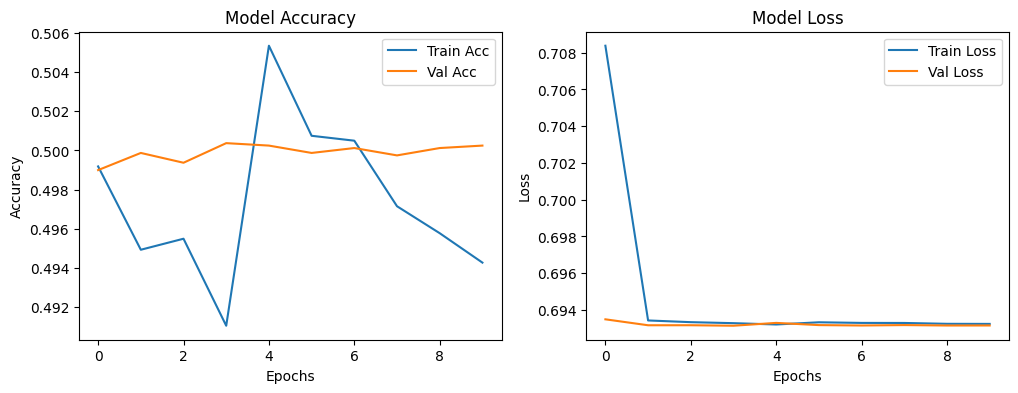

In [9]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


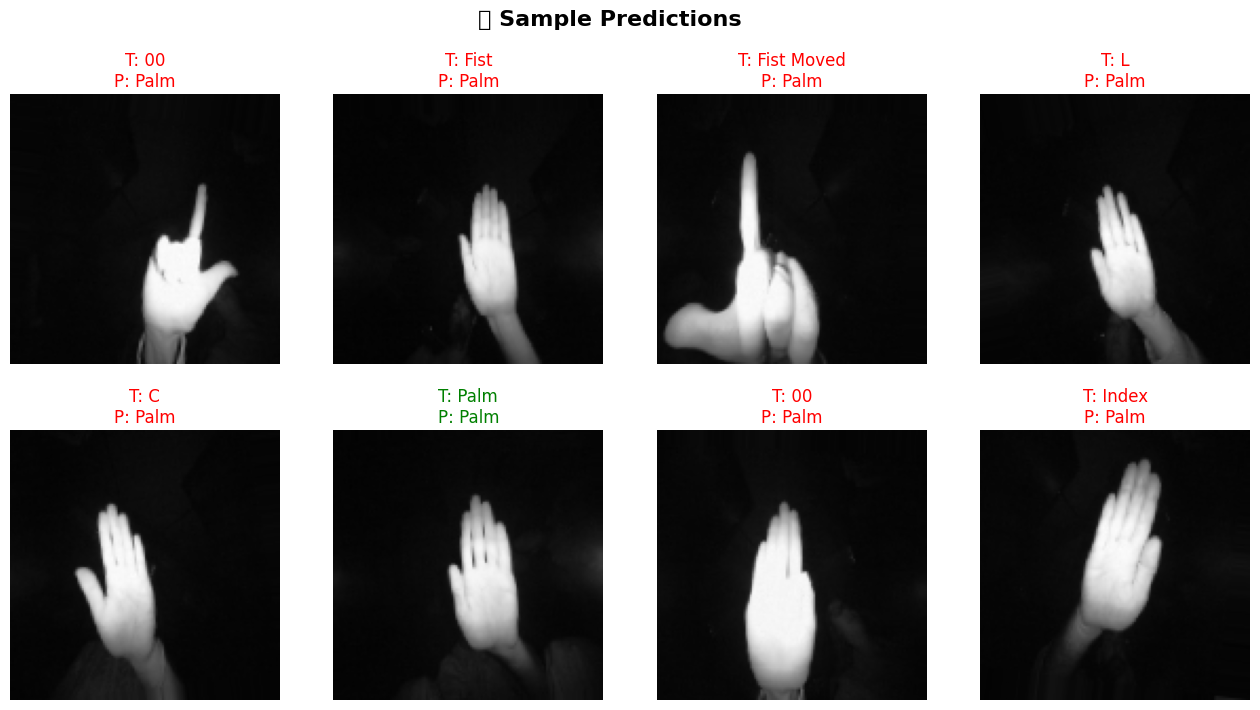

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Number of samples to visualize
num_samples = 8

# Get a batch from validation generator
images, labels = next(val_gen)

# Predict
preds = model.predict(images[:num_samples])
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(labels[:num_samples], axis=1)

# Reverse class_indices for easy lookup (e.g., 0 -> "01_palm")
idx_to_class = {v: k for k, v in val_gen.class_indices.items()}

# Safe label fetch function
def safe_label_lookup(class_key):
    # If it's already in label_map, return directly
    if class_key in label_map:
        return label_map[class_key]
    # If it's like "04", try to find the full key ("04_*")
    for k in label_map.keys():
        if k.startswith(class_key):
            return label_map[k]
    return class_key  # fallback (just return raw)

# Plot
plt.figure(figsize=(16, 8))
for i in range(num_samples):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])
    plt.axis("off")

    # Map true & predicted class to readable label
    true_label_key = idx_to_class[true_classes[i]]
    pred_label_key = idx_to_class[pred_classes[i]]

    true_label = safe_label_lookup(true_label_key)
    pred_label = safe_label_lookup(pred_label_key)

    color = "green" if true_label == pred_label else "red"
    plt.title(f"T: {true_label}\nP: {pred_label}", color=color, fontsize=12)

plt.suptitle("📌 Sample Predictions", fontsize=16, fontweight="bold")
plt.show()
